In [1]:
# import library
import numpy as np
import pandas as pd

In [10]:
# Read data
df_can = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows= range(20), skipfooter= 2)
print('Data download and read into dataframe!')

Data download and read into dataframe!


In [11]:
# Overview data
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [12]:
# print the dimensions of the dataframe
df_can.shape

(195, 43)

In [13]:
# Clean up the data
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis= 1, inplace= True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [14]:
# rename columns
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace= True)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [15]:
# examine the types of the column labels
all(isinstance(column, str) for column in df_can.columns)

False

In [16]:
# change column type to string
df_can.columns = list(map(str, df_can.columns))

# check type
all(isinstance(column,str) for column in df_can.columns)

True

In [17]:
# set the country name as index - useful to look up by .loc
df_can.set_index('Country', inplace= True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [18]:
# add Total column
df_can['Total'] = df_can.sum(axis= 1)
df_can.head()

<ipython-input-18-fc39fea0d805>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis= 1)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [19]:
print('data dimensions: ', df_can.shape)

data dimensions:  (195, 38)


In [20]:
# create a list of years used to plotting data
years = list(map(str,range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [21]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

print(mpl.__version__)

3.3.4


In [26]:
# AREA PLOTS
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


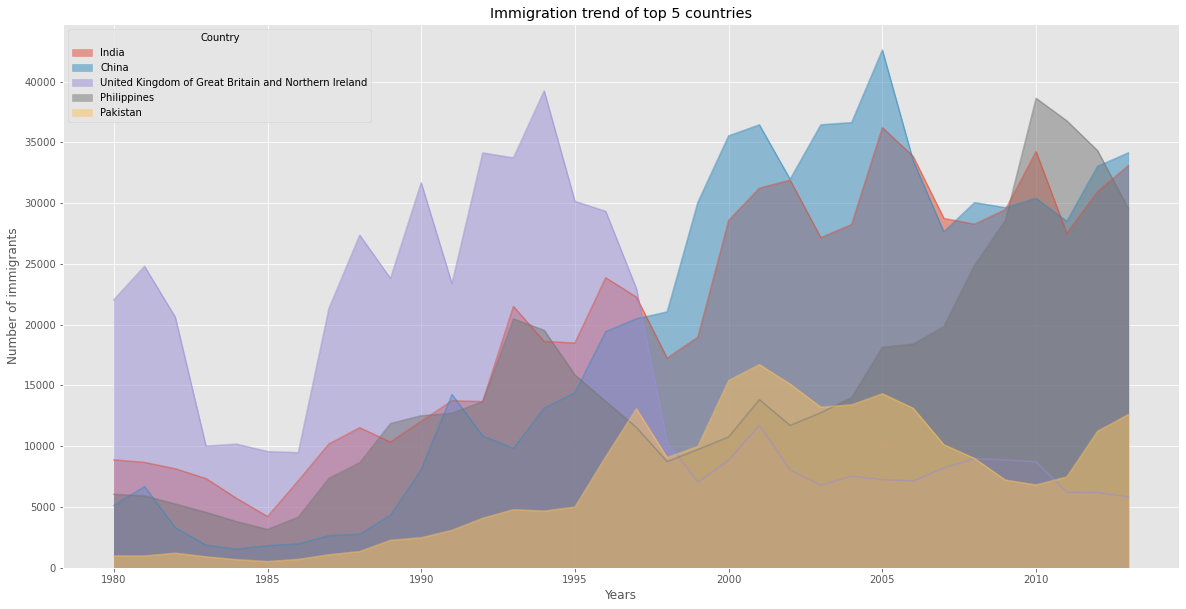

In [28]:
df_top5.index = df_top5.index.map(int)

df_top5.plot(kind= 'area', stacked= False, figsize=(20,10))

plt.title('Immigration trend of top 5 countries')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')

plt.show()

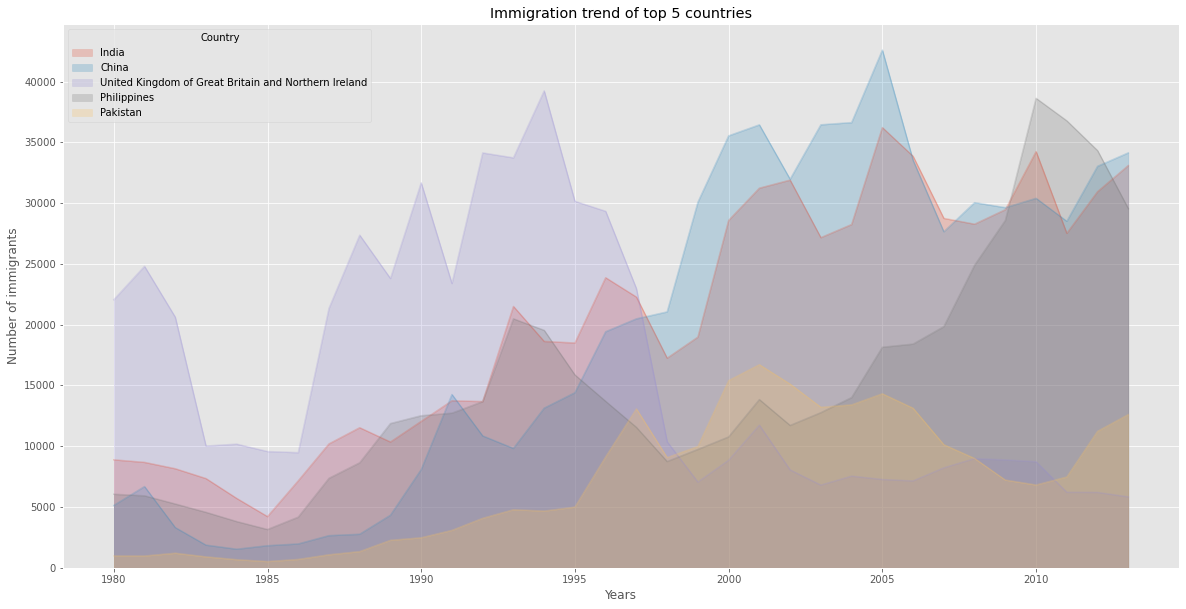

In [31]:
df_top5.plot(kind= 'area', alpha= 0.25, stacked= False, figsize=(20, 10))

plt.title('Immigration trend of top 5 countries')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')

plt.show()

In [33]:
df_below5 = df_can.tail(5)

df_below5 = df_below5[years].transpose()

df_below5.head()

Country,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


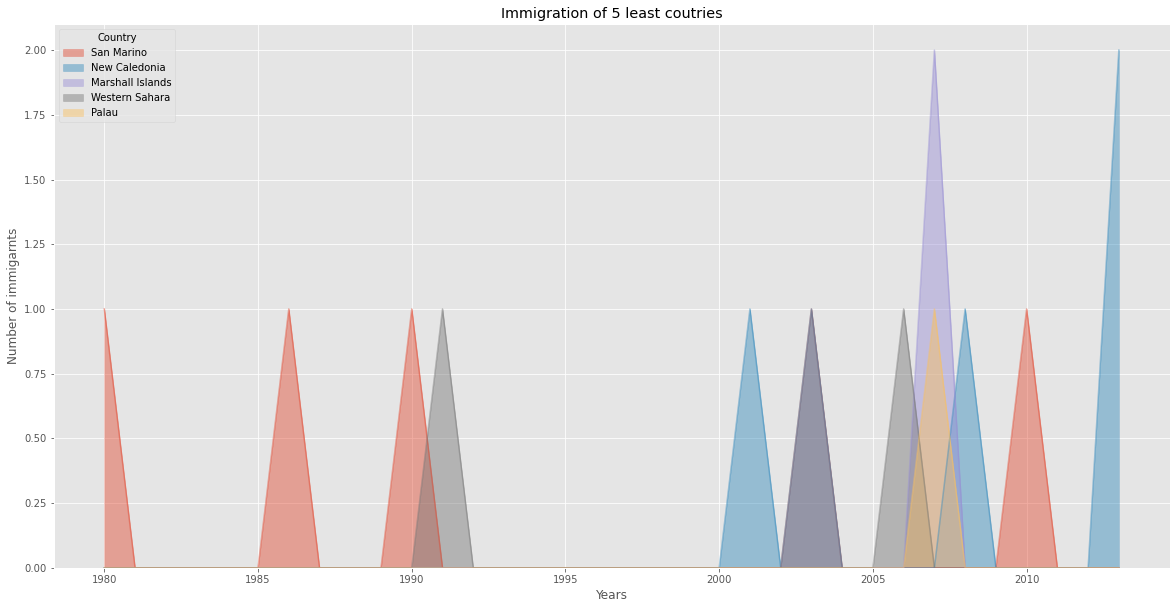

In [35]:
df_below5.index = df_below5.index.map(int)

df_below5.plot(kind= 'area', alpha= 0.45, stacked= False, figsize= (20,10))

plt.title('Immigration of 5 least coutries')
plt.xlabel('Years')
plt.ylabel('Number of immigarnts')

plt.show()

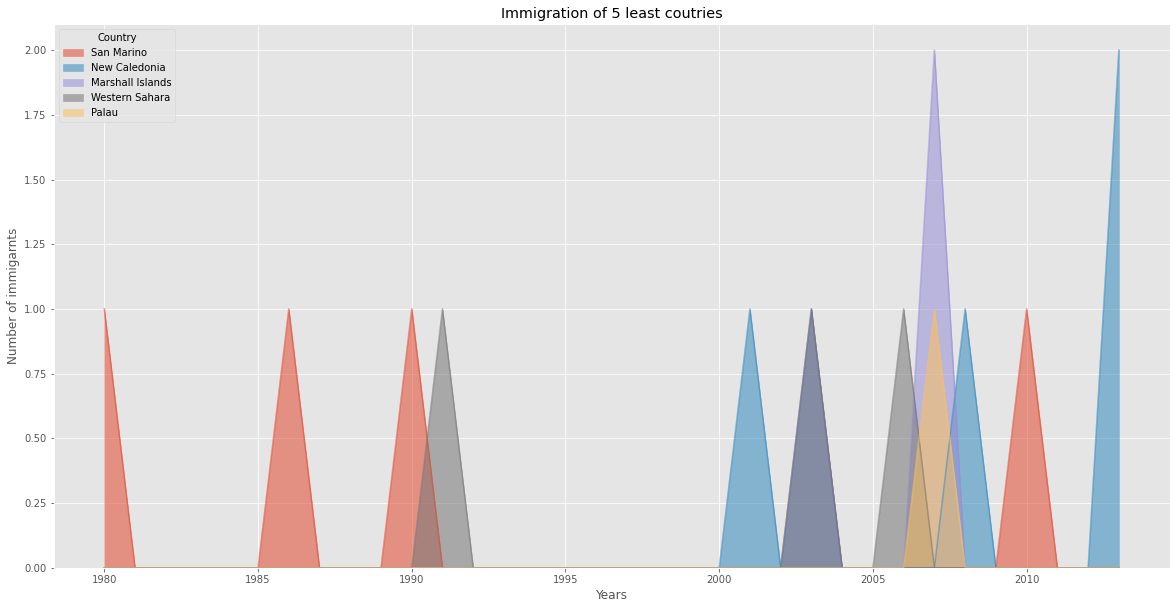

In [37]:
df_below5.index = df_below5.index.map(int)

ax = df_below5.plot(kind= 'area', alpha= 0.55, stacked= False, figsize= (20,10))

ax.set_title('Immigration of 5 least coutries')
ax.set_xlabel('Years')
ax.set_ylabel('Number of immigarnts');


In [38]:
# HISTOGRAMS
# have a quick view of 2013 data
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [39]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) 
print(bin_edges) 

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


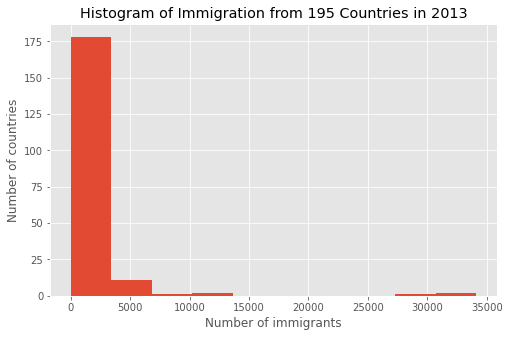

In [40]:
df_can['2013'].plot(kind= 'hist', figsize= (8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.xlabel('Number of immigrants')
plt.ylabel('Number of countries')

plt.show()

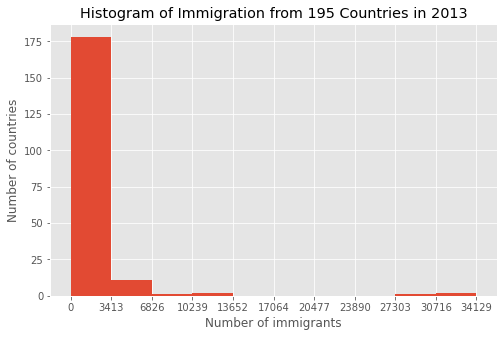

In [42]:
# adjust the background
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind= 'hist', figsize= (8, 5), xticks= bin_edges)

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.xlabel('Number of immigrants')
plt.ylabel('Number of countries')

plt.show()

In [45]:
# Multiple data into a histogram

df_mul = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_mul.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


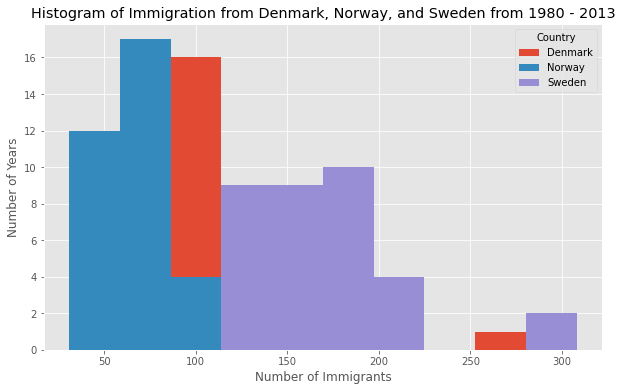

In [46]:
df_mul.plot(kind= 'hist',figsize= (10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')

plt.show()

In [ ]:
# Let's make a few modifications to improve the impact and aesthetics of the previous plot:

# increase the bin size to 15 by passing in bins parameter;
# set transparency to 60% by passing in alpha parameter;
# label the x-axis by passing in x-label parameter;
# change the colors of the plots by passing in color parameter.

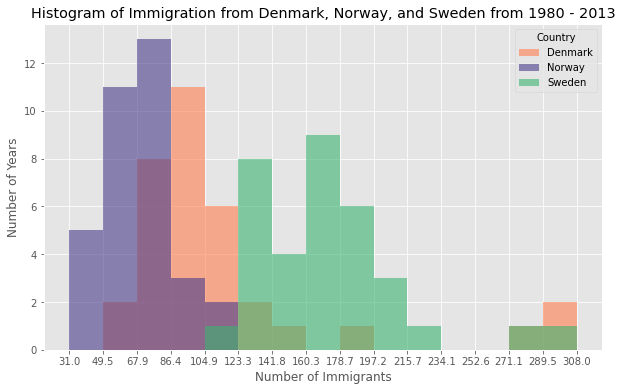

In [47]:
count, bin_edges = np.histogram(df_mul, 15)

df_mul.plot(kind= 'hist', alpha= 0.6, bins = 15, figsize= (10, 6), xticks= bin_edges, color= ['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

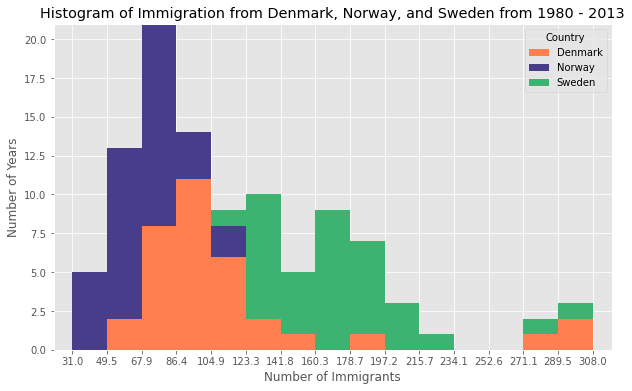

In [48]:
count, bin_edges = np.histogram(df_mul, 15)
xmin = bin_edges[0] -10 #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes
xmax = bin_edges[-1] + 10 #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

df_mul.plot(kind= 'hist', figsize = (10, 6), bins= 15, xticks= bin_edges, color=['coral', 'darkslateblue', 'mediumseagreen'], stacked= True, xlim=(xmin,xmax))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

In [53]:
df_mul2 = df_can.loc[['Greece', 'Albania','Bulgaria'], years].transpose()
df_mul2.head()

Country,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11


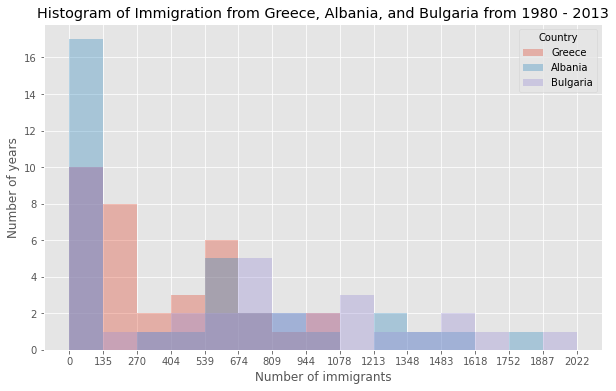

In [55]:
count, bin_edges = np.histogram(df_mul2, 15)

df_mul2.plot(kind= 'hist', figsize=(10, 6), alpha= 0.35, bins= 15, xticks= bin_edges)

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.xlabel('Number of immigrants')
plt.ylabel('Number of years')

plt.show()

In [56]:
# BAR CHART

In [60]:
df_iceland = df_can.loc[['Iceland'], years].transpose()
df_iceland.head()

Country,Iceland
1980,17
1981,33
1982,10
1983,9
1984,13


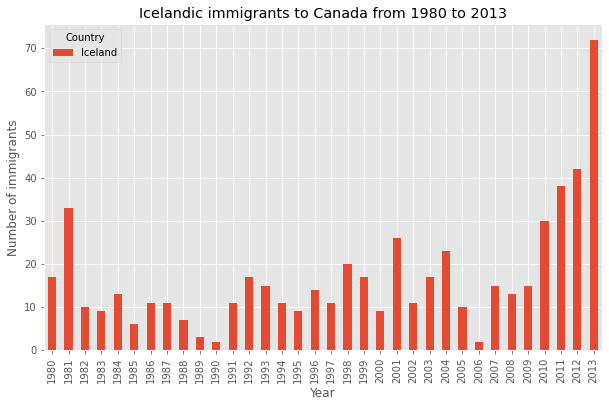

In [61]:
df_iceland.plot(kind= 'bar', figsize= (10, 6))

plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of immigrants')

plt.show()

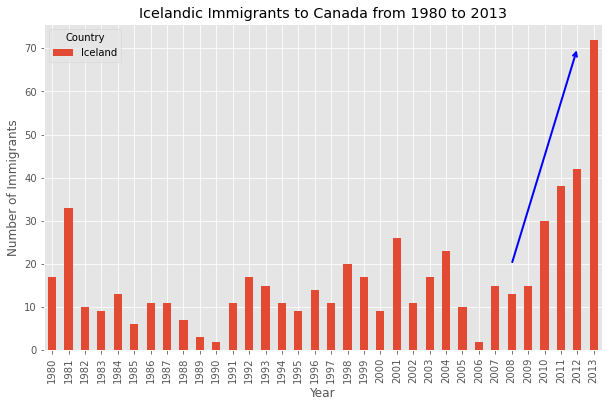

In [62]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

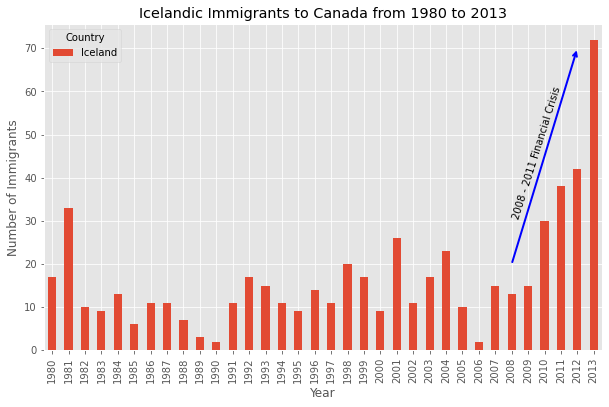

In [63]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

In [69]:
# Horizontal Bar Plot
df_top15 = df_can.head(15)
df_top15 = df_top15[years].transpose()
df_top15.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,Poland,Lebanon,France,Jamaica,Viet Nam,Romania
1980,8880,5123,22045,6051,978,9378,1172,185,1011,863,1409,1729,3198,1191,375
1981,8670,6682,24796,5921,972,10030,1429,371,1456,2930,1119,2027,2634,1829,438
1982,8147,3308,20620,5249,1201,9074,1822,290,1572,5881,1159,2219,2661,2162,583
1983,7338,1863,10015,4562,900,7100,1592,197,1081,4546,789,1490,2455,3404,543
1984,5704,1527,10170,3801,668,6661,1977,1086,847,3588,1253,1169,2508,7583,524


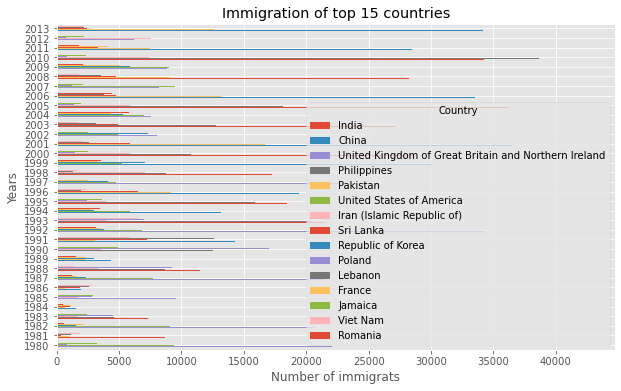

In [71]:
df_top15.plot(kind= 'barh', figsize =(10, 6))

plt.title('Immigration of top 15 countries')
plt.xlabel('Number of immigrats')
plt.ylabel('Years')

plt.show()